+------------- Simulated Dataset Options -------------+
                                                    2 | Dimensionality of Latent State
                                                   20 | Dimensionality of Observed State (# neurons)
                                                 1000 | Duration of trials (ms):
                                                   20 | Size of bins (ms):
                                                    5 | Number of Trials
+-----------------------------------------------------+
Sampling trial 5 ...
Average firing rate per neuron in this dataset: 66.740 Hz.
Initializing parameters with Poisson-PCA..
+-------------------- Fit Options --------------------+
                                                    2 | Dimensionality of Latent State
                                                   20 | Dimensionality of Observed State (# neurons)
                                                Batch | EM mode:
                                       

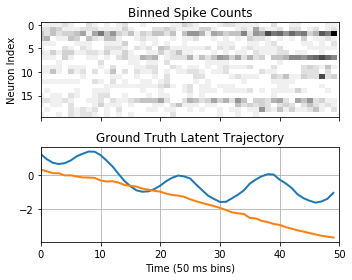

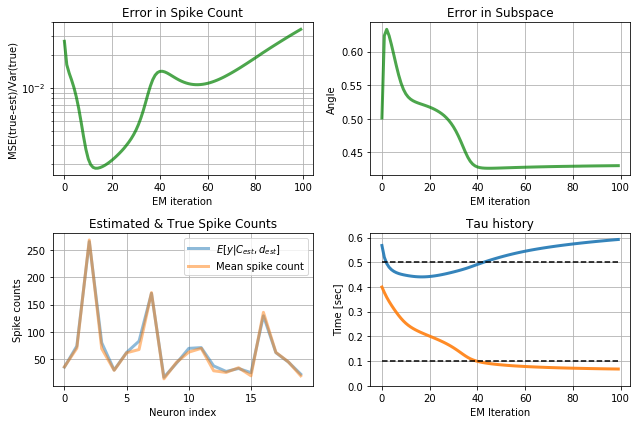

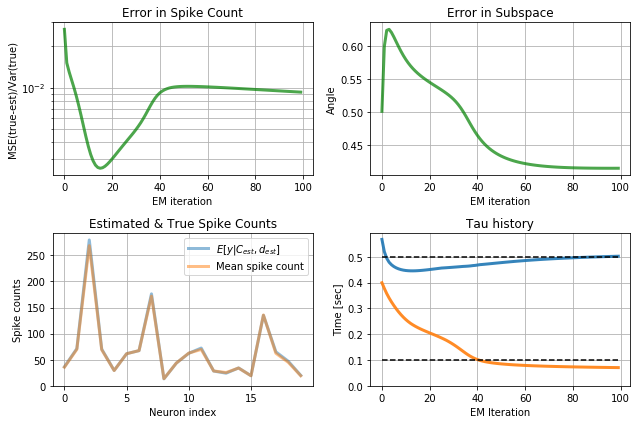

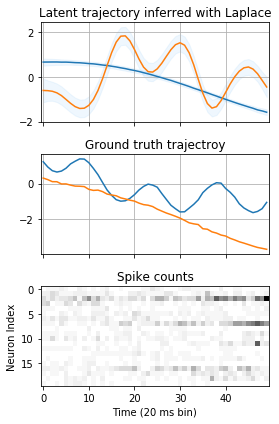

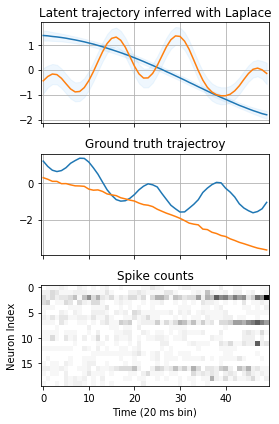

In [1]:
import funs.util as util
import funs.engine as engine
import matplotlib.pyplot as plt
import numpy as np

# Initialize random number generator
np.random.seed(123)

# Specify dataset & fitting parameters
xdim 	  = 2		
ydim      = 20		
numTrials = 5		
trialDur  = 1000 # in ms
binSize   = 20	 # in ms
maxEMiter = 100		
dOffset   = 1	 # controls firing rate

# Sample from the model (make a toy dataset)
training_set  = util.dataset(
	seed	  = np.random.randint(10000),
	xdim 	  = xdim,
	ydim 	  = ydim,
	numTrials = numTrials,
	trialDur  = trialDur,
	binSize   = binSize,
	dOffset   = dOffset,
	fixTau 	  = True, 
	fixedTau  = np.linspace(0.1,0.5,xdim),
	drawSameX = True)

# Initialize parameters using Poisson-PCA
initParams = util.initializeParams(xdim, ydim, training_set)

# Fit using vanilla (batch) EM
fitBatch = engine.PPGPFAfit(
	experiment 		= training_set,
	initParams 		= initParams,
	inferenceMethod = 'laplace',
	EMmode 			= 'Batch',
	maxEMiter 		= maxEMiter)

# Fit using online EM
fitOnline = engine.PPGPFAfit(
 	experiment 		= training_set,
 	initParams 		= initParams,
 	EMmode 			= 'Online',
 	maxEMiter 		= maxEMiter,
 	inferenceMethod = 'laplace',
	batchSize 		= 5)

# Make plots
training_set.plotTrajectory();plt.show()
fitBatch.plotParamSeq()
fitOnline.plotParamSeq();plt.show()

fitBatch.plotTrajectory()
fitOnline.plotTrajectory();plt.show()

In [11]:
import scipy.io as sio
dataPPGPFA = sio.loadmat('/Users/tobiasleva/Downloads/poisson-gpfa-master/data/Stevenson_2011_e1.mat')

In [16]:
dataPPGPFA['Subject']

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
class readNumpy():
    def __init__(self,input_data, paramfilename = None):
        

        data = []
        ydim, T = np.shape(dataPPGPFA['dataPPGPFA'][0,0]['spkcount'])
        # xdim, trash = np.shape(dataPPGPFA['dataPPGPFA'][0,0]['x'])
        trialDur = int(dataPPGPFA['dataPPGPFA'][0,0]['trialDur']*1000)
        binSize = int(trialDur/T)

        numTrials = len(dataPPGPFA['dataPPGPFA'].T)

        for i in range(numTrials):
            data.append({
                'Y':dataPPGPFA['dataPPGPFA'][0,i]['spkcount']})
                # 'X':dataPPGPFA['dataPPGPFA'][0,i]['x']})

        self.data = data
        self.ydim = ydim
        # self.xdim = xdim
        self.T = T
        self.trialDur = trialDur
        self.binSize = binSize
        self.numTrials = numTrials

        if paramfilename != None:
            importedParams = sio.loadmat(paramfilename)
            initParams =  importedParams['initParams']
            tau = np.ndarray.flatten(initParams['tau'][0][0])
            C = initParams['C'][0][0]
            d = np.ndarray.flatten(initParams['d'][0][0])
            self.initParams = {'tau': tau, 'C':C, 'd':d}

KeyError: 'dataPPGPFA'